# Parker Solar Probe Data Download Example

Tamar Ervin

- Downloading [PSP](https://link.springer.com/article/10.1007/s11214-015-0211-6) data with [PySPEDAS](https://pyspedas.readthedocs.io/en/latest/)
- Using [pyTplot](https://pytplot.readthedocs.io/en/latest/) to plot the data


In [17]:
# !pip install pyspedas==1.4.36
# !pip install sunpy==4.1.2
# !pip install astropy==5.3

In [1]:
# pyspedas: python for space physics data analysis environment -> this lets you download spacecraft data
import pyspedas
from pyspedas import time_string

# pytplot: tplot -> time series plotting for python
from pytplot import tplot, get_data

# astrospice : package for getting spacecraft trajectories/celestial coordinates
import astrospice

# sunpy : solar physics package for python
import sunpy 
import sunpy.coordinates as scoords

# astropy : astronomy for python
import astropy.units as u

import sys, os
import datetime # convert stuff between date systems
import pandas as pd # for dataframes 
import matplotlib.pyplot as plt # mathematical plotting in python 

# for sc in ['psp','solar orbiter'] : kernels = astrospice.registry.get_kernels(sc,'predict') 


## Download and Plot the Data

Example data to download:
- [FIELDS](https://link.springer.com/article/10.1007/s11214-016-0244-5): Radial, Tangential, Normal (RTN) magnetic field data
- [SWEAP/SPAN-I](https://iopscience.iop.org/article/10.3847/1538-4357/ac93f5) Proton: Radial, Tangential, Normal (RTN) proton velocity and proton density data
- [SWEAP/SPAN-I](https://iopscience.iop.org/article/10.3847/1538-4357/ac93f5) Alpha Particle: Radial, Tangential, Normal (RTN) alpha particle velocity and density

Data will download to a folder titled 'psp_data' in this same repo!

Don't worry if this takes a while to run! The data is at a very high cadence and takes a bit to download depending on the time range

## Plot the data using pyTplot

[pyTplot](https://pytplot.readthedocs.io/en/latest/) is a Python package that works with PySPEDAS to plot space physics data! It already has all the information needed to plot observables in terms of their units! You can also create your own plots of the data using matplotlib.


In [2]:
### ------- TIME PERIOD OF INTEREST ------- ###
# this is an example of data from the heliospheric current sheet (HCS) crossing during PSP Encounter 15
time_range = ['2023-03-17/12:00', '2023-03-18/12:00']

21-Oct-25 10:59:58: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2023/
21-Oct-25 10:59:59: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230317_v02.cdf
21-Oct-25 10:59:59: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230318_v02.cdf
21-Oct-25 10:59:59: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2023/
21-Oct-25 11:00:00: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230317_v02.cdf
21-Oct-25 11:00:00: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230318_v02.cdf


['psp_fld_l2_mag_RTN_4_Sa_per_Cyc', 'psp_fld_l2_quality_flags']


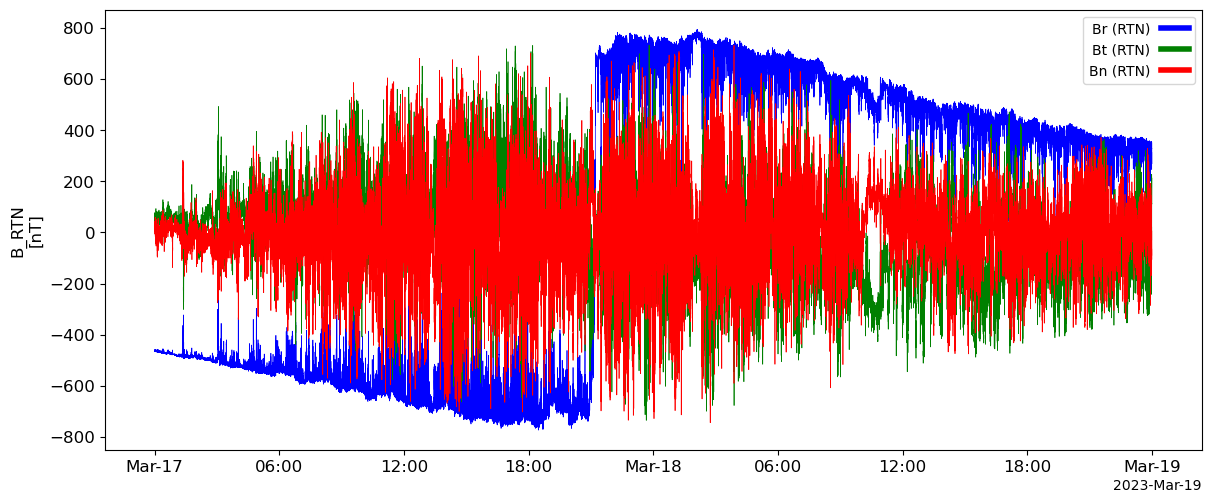

In [3]:
### ------- FIELDS: MAG RTN DATA ------- ###
fields_vars = pyspedas.psp.fields(trange=time_range, datatype='mag_RTN_4_Sa_per_Cyc')

### print out the variables stored in the magnetic field data
print(fields_vars)

### get the RTN magnetic field
B_RTN = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')

### plot the data!
tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc'])

### CONVERT TIME FROM JULIAN TIME TO DATETIME OBJECT
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in B_RTN.times]

### CREATE DATAFRAME
rd = {'Time': date_obj, 'Br': B_RTN.y[:, 0], 'Bt': B_RTN.y[:, 1], 'Bn': B_RTN.y[:, 2]}
fields = pd.DataFrame(data=rd)

### SAVE DATAFRAME AS CSV
fields.to_csv('fields.csv') 

In [4]:
fields

,Time,Br,Bt,Bn
0,2023-03-17 00:00:00.153835,-459.539825,70.739311,29.416058
1,2023-03-17 00:00:00.372288,-459.711517,69.680466,33.604626
2,2023-03-17 00:00:00.590674,-459.045135,72.018593,35.691044
3,2023-03-17 00:00:00.809127,-459.321564,70.967270,32.100491
4,2023-03-17 00:00:01.027580,-459.808746,69.649498,31.725451
...,...,...,...,...
791007,2023-03-18 23:59:58.957802,268.311279,213.750458,-61.276646
791008,2023-03-18 23:59:59.176256,289.615265,165.458115,-92.217667
791009,2023-03-18 23:59:59.394709,286.590302,182.615662,-59.358253
791010,2023-03-18 23:59:59.613095,299.840607,159.870956,-59.775787


21-Oct-25 11:00:06: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf00_l3_mom/2023/


Using LEVEL=L3


21-Oct-25 11:00:07: File is current: psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230317_v04.cdf
21-Oct-25 11:00:07: File is current: psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230318_v04.cdf


['psp_spi_QUALITY_FLAG', 'psp_spi_DENS', 'psp_spi_VEL_INST', 'psp_spi_VEL_SC', 'psp_spi_VEL_RTN_SUN', 'psp_spi_T_TENSOR_INST', 'psp_spi_TEMP', 'psp_spi_EFLUX_VS_ENERGY', 'psp_spi_EFLUX_VS_THETA', 'psp_spi_EFLUX_VS_PHI', 'psp_spi_SUN_DIST', 'psp_spi_VENUS_DIST', 'psp_spi_SC_VEL_RTN_SUN', 'psp_spi_QUAT_SC_TO_RTN', 'psp_spi_MAGF_SC', 'psp_spi_MAGF_INST']


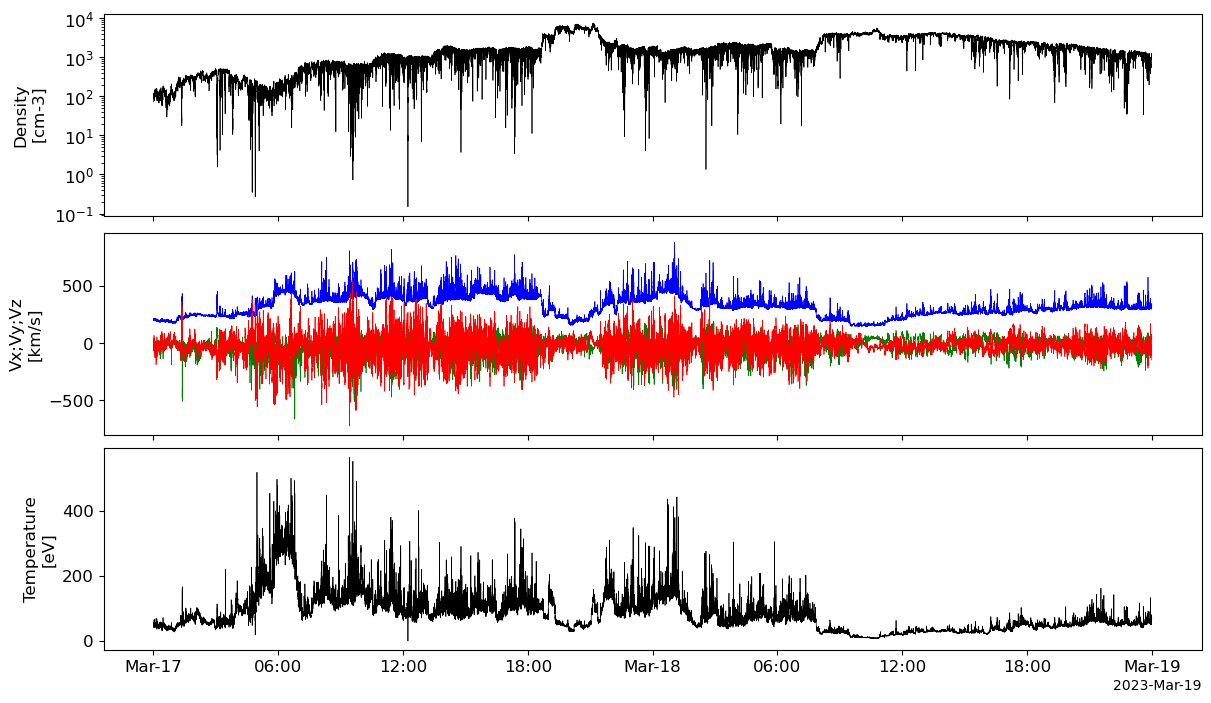

In [5]:
### ------- SPAN-I: PROTON (HYDROGEN) MOMENTS ------- ###
### download proton data
proton_vars = pyspedas.psp.spi(trange=time_range, datatype='sf00_l3_mom', level='l3')

### print out the variables stored in the proton data
print(proton_vars)

### get the RTN velocity, density, and temperature
Np = get_data('psp_spi_DENS')
vp_RTN = get_data('psp_spi_VEL_RTN_SUN')
Tp = get_data('psp_spi_TEMP')

### CONVERT TIME FROM JULIAN TIME TO DATETIME OBJECT
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in Np.times]

### CREATE DATAFRAME
rd = {'Time': date_obj, 'vr': vp_RTN.y[:, 0], 'vt': vp_RTN.y[:, 1], 'vn': vp_RTN.y[:, 2], 'Np': Np.y, 'Tp': Tp.y}
protons = pd.DataFrame(data=rd)

### SAVE DATAFRAME AS CSV
# protons.to_csv(os.path.join('results', 'protons.csv'))

### plot the data!
tplot(['psp_spi_DENS', 'psp_spi_VEL_RTN_SUN', 'psp_spi_TEMP'])

In [6]:
protons

,Time,vr,vt,vn,Np,Tp
0,2023-03-17 00:00:03.869595,216.121811,-8.346628,31.184471,72.195038,41.848660
1,2023-03-17 00:00:07.364836,201.977798,-8.060006,15.134486,83.939156,41.792698
2,2023-03-17 00:00:10.860137,204.622040,-2.734370,-8.305954,83.250435,47.484131
3,2023-03-17 00:00:14.355377,208.022537,-24.612598,27.923014,88.809814,46.484776
4,2023-03-17 00:00:17.850618,202.057358,-42.485703,2.236552,97.204979,47.542767
...,...,...,...,...,...,...
78719,2023-03-18 23:59:45.415700,317.690277,-102.556511,35.999821,1232.727661,65.334381
78720,2023-03-18 23:59:48.910941,310.887329,-84.589439,31.938829,1196.579346,63.912716
78721,2023-03-18 23:59:52.406241,323.035309,-118.320900,53.034309,1195.040039,65.877647
78722,2023-03-18 23:59:55.901483,341.417572,-144.636108,49.197903,1231.612793,69.274925


21-Oct-25 11:00:32: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf0a_l3_mom/2023/


Using LEVEL=L3


21-Oct-25 11:00:32: File is current: psp_data/sweap/spi/l3/spi_sf0a_l3_mom/2023/psp_swp_spi_sf0a_l3_mom_20230317_v04.cdf
21-Oct-25 11:00:33: File is current: psp_data/sweap/spi/l3/spi_sf0a_l3_mom/2023/psp_swp_spi_sf0a_l3_mom_20230318_v04.cdf


['psp_spi_QUALITY_FLAG', 'psp_spi_DENS', 'psp_spi_VEL_INST', 'psp_spi_VEL_SC', 'psp_spi_VEL_RTN_SUN', 'psp_spi_T_TENSOR_INST', 'psp_spi_TEMP', 'psp_spi_EFLUX_VS_ENERGY', 'psp_spi_EFLUX_VS_THETA', 'psp_spi_EFLUX_VS_PHI', 'psp_spi_SUN_DIST', 'psp_spi_VENUS_DIST', 'psp_spi_SC_VEL_RTN_SUN', 'psp_spi_QUAT_SC_TO_RTN', 'psp_spi_MAGF_SC', 'psp_spi_MAGF_INST']


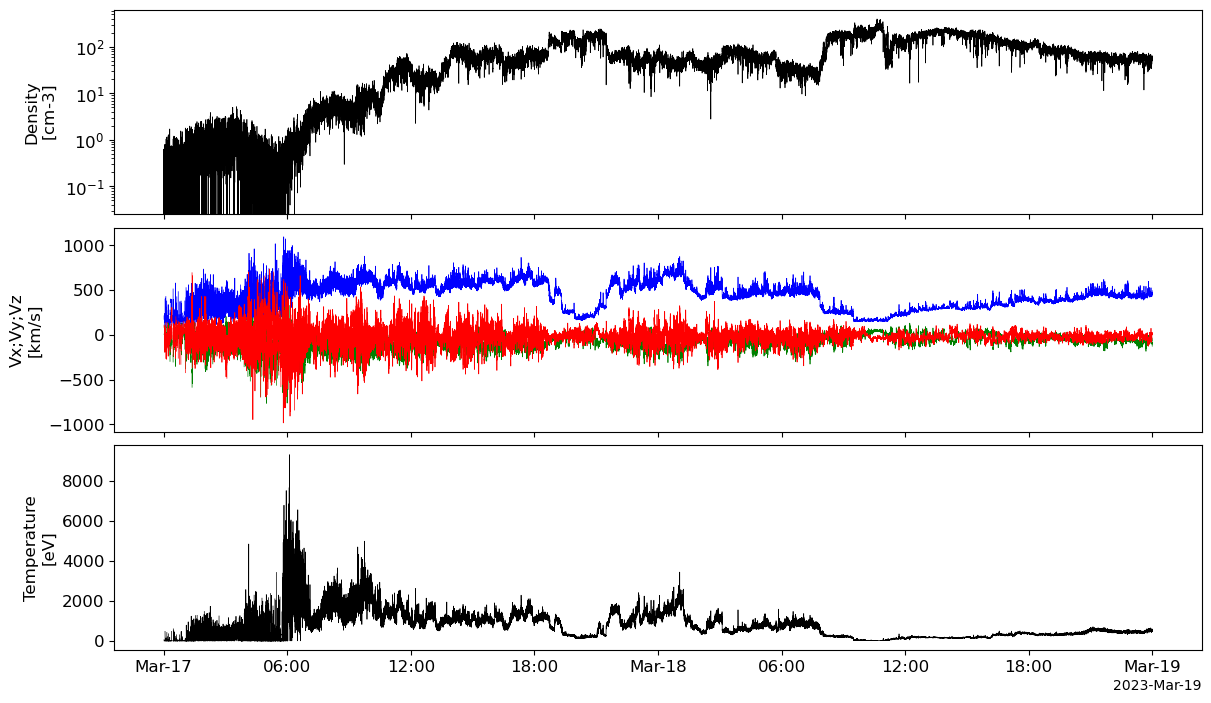

In [11]:
### ------- SPAN-I: ALPHA PARTICLE (HELIUM) MOMENTS ------- ###
### download alpha particle data
alpha_vars = pyspedas.psp.spi(trange=time_range, datatype='sf0a_l3_mom', level='l3')

### print out the variables stored in the alpha particle data
print(alpha_vars)

### READ IN SWEAP VELOCITY (RTN), DENSITY, AND TEMPERATURE DATA
Na = get_data('psp_spi_DENS')
va_RTN = get_data('psp_spi_VEL_RTN_SUN')
Ta = get_data('psp_spi_TEMP')

### CONVERT TIME FROM JULIAN TIME TO DATETIME OBJECT
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in Na.times]

### CREATE DATAFRAME
rd = {'Time': date_obj, 'vra': va_RTN.y[:, 0], 'vta': va_RTN.y[:, 1], 'vna': va_RTN.y[:, 2], 'Na': Na.y, 'Ta': Ta.y}
alphas = pd.DataFrame(data=rd)

### SAVE DATAFRAME AS CSV
# alphas.to_csv(os.path.join('results', 'alphas.csv'))

### plot the data!
tplot(['psp_spi_DENS', 'psp_spi_VEL_RTN_SUN', 'psp_spi_TEMP'])

# Create Parker FIELDS/SWEAP Dataframe

Now that we have a dataframe for each instrument, we then use pandas to merge the dataframes as a function of time.



In [12]:
### merge the PAS and MAG dataframes
merged_df = pd.merge_asof(fields, protons, on='Time', direction='backward')

### merge the HIS and newly merged dataframe
merged_df = pd.merge_asof(alphas, merged_df, on='Time', direction='backward')
merged_df = merged_df.set_index('Time')

In [22]:
df = merged_df.copy()
df['Time'] = df.index.to_list()
df

,vra,vta,vna,Na,Ta,Br,Bt,Bn,vr,vt,vn,Np,Tp,Time
Time,,,,,,,,,,,,,,
2023-03-17 00:00:03.869595,136.413834,-66.148483,49.722652,0.388385,-0.000087,-460.497559,66.652130,25.975363,NaN,NaN,NaN,NaN,NaN,2023-03-17 00:00:03.869595
2023-03-17 00:00:07.364836,NaN,NaN,NaN,0.000000,NaN,-460.015228,73.225525,21.024397,216.121811,-8.346628,31.184471,72.195038,41.848660,2023-03-17 00:00:07.364836
2023-03-17 00:00:10.860137,NaN,NaN,NaN,0.000000,NaN,-461.111633,69.096474,14.254626,201.977798,-8.060006,15.134486,83.939156,41.792698,2023-03-17 00:00:10.860137
2023-03-17 00:00:14.355377,NaN,NaN,NaN,0.000000,NaN,-463.271484,45.696793,24.873411,204.622040,-2.734370,-8.305954,83.250435,47.484131,2023-03-17 00:00:14.355377
2023-03-17 00:00:17.850618,213.295364,8.470299,84.349762,0.307426,-0.000088,-463.071014,45.171581,26.641287,208.022537,-24.612598,27.923014,88.809814,46.484776,2023-03-17 00:00:17.850618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-18 23:59:45.415700,467.251678,-119.165878,4.757739,56.570091,499.240814,323.541870,117.854416,-40.503208,316.523438,-80.164185,51.505405,1178.158325,62.458263,2023-03-18 23:59:45.415700
2023-03-18 23:59:48.910941,464.533112,-115.335388,-0.120976,52.530193,589.464417,344.583527,48.452587,-47.286186,317.690277,-102.556511,35.999821,1232.727661,65.334381,2023-03-18 23:59:48.910941
2023-03-18 23:59:52.406241,480.955933,-100.031128,12.107570,50.822128,488.711578,323.028778,136.430649,-9.331066,310.887329,-84.589439,31.938829,1196.579346,63.912716,2023-03-18 23:59:52.406241


# Plotting

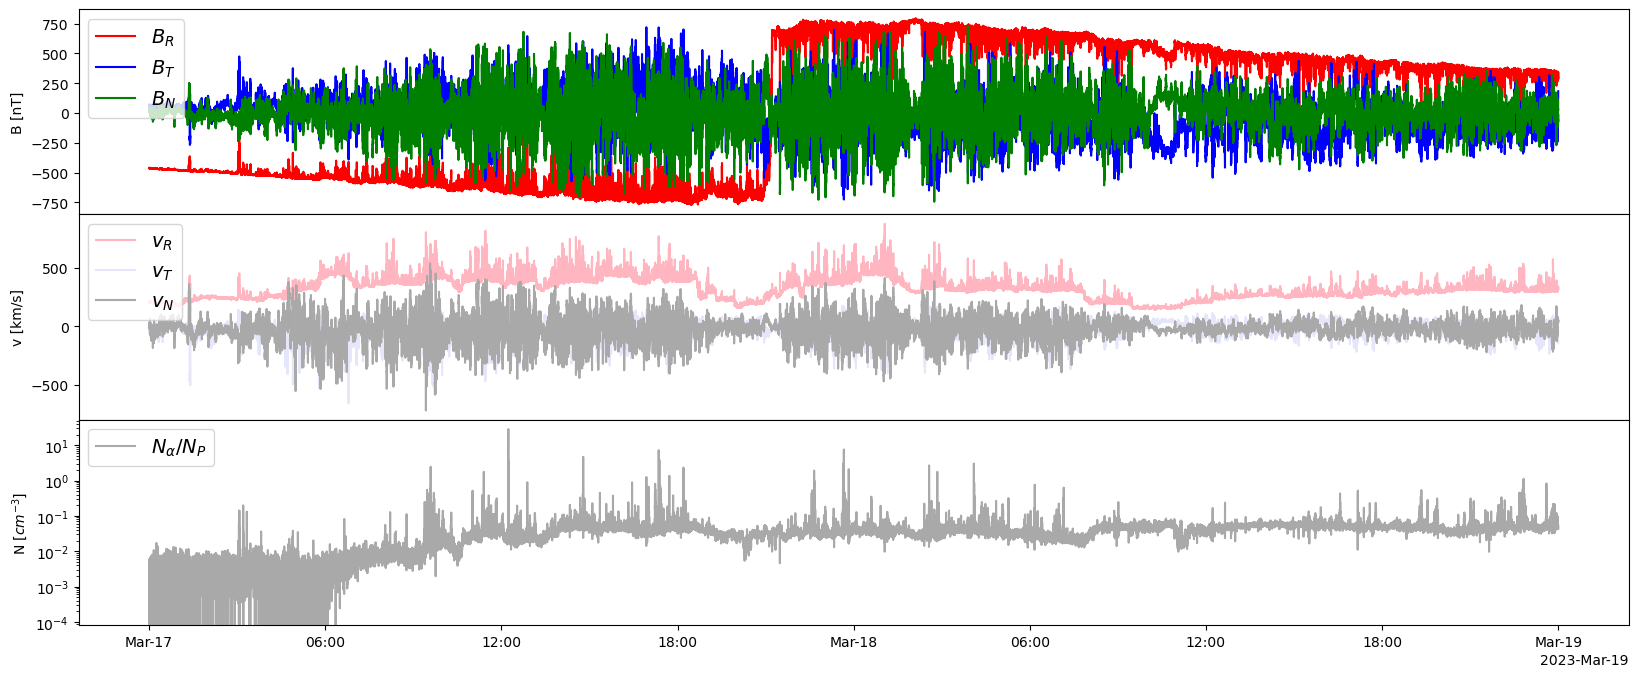

In [35]:
# package that you use for plotting: matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(20, 8), sharex='all', gridspec_kw={'hspace':0})

# first axes: plot magnetic field
ax = axs[0]
ax.plot(df.Time, df.Br, color='red', label=r'$B_R$')
ax.plot(df.Time, df.Bt, color='blue', label=r'$B_T$')
ax.plot(df.Time, df.Bn, color='green', label=r'$B_N$')
ax.set(ylabel='B [nT]')
ax.legend(loc='upper left', fontsize=14)

# second axes: plot velocity
ax = axs[1]
ax.plot(df.Time, df.vr, color='lightpink', label=r'$v_R$')
ax.plot(df.Time, df.vt, color='lavender', label=r'$v_T$')
ax.plot(df.Time, df.vn, color='darkgray', label=r'$v_N$')
ax.set(ylabel='v [km/s]')
ax.legend(loc='upper left', fontsize=14)

# third axes: plot density
ax = axs[2]
# ax.plot(df.Time, df.Np, color='lightpink', label=r'$N_P$')
# ax.plot(df.Time, df.Na, color='lavender', label=r'$N_\alpha$')
ax.plot(df.Time, df.Na/df.Np, color='darkgray', label=r'$N_\alpha / N_P$')
ax.set(ylabel=r'N [$cm^{-3}$]', yscale='log')
ax.legend(loc='upper left', fontsize=14)

# Find the spacecraft trajectory

Now we will use astrospice to generate the trajectory of the spacecraft. We transform from inertial coordinates to the solar co-rotating (Carrington) frame!

In [ ]:
### Create SkyCoord for Parker in the inertial (J2000) frame
psp_inertial = astrospice.generate_coords(
    'SOLAR PROBE PLUS', pd.to_datetime(merged_df.index.to_list())

)

### Transform to solar co-rotating frame 
psp_carrington = psp_inertial.transform_to(
    scoords.HeliographicCarrington(observer="self")
)

Now we will add the position information to our merged dataframe and save as a CSV file!

In [ ]:
### ADD POSITION INFORMAITON AND SAVE
parker = merged_df.copy()
parker['lon'] = psp_carrington.lon.value
parker['lat'] = psp_carrington.lat.value
parker['rAU'] = psp_carrington.radius.to(u.AU).value
parker['NpR2'] = parker.Np * (parker.rAU ** 2)
parker['BrR2'] = parker.Br * (parker.rAU ** 2)
parker.to_csv(os.path.join('results', 'parker.csv'))
parker